# Fake News Detection

Using a kaggle competition dataset from 2018
https://www.kaggle.com/competitions/fake-news/overview

In [2]:
%pip install transformers evaluate


[notice] A new release of pip is available: 23.0 -> 23.0.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import transformers

/opt/conda/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Data

In [4]:
# read in data
train_df = pd.read_csv('./data/train.csv')
test_df = pd.read_csv('./data/test.csv')

In [5]:
train_df

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1
...,...,...,...,...,...
20795,20795,Rapper T.I.: Trump a ’Poster Child For White S...,Jerome Hudson,Rapper T. I. unloaded on black celebrities who...,0
20796,20796,"N.F.L. Playoffs: Schedule, Matchups and Odds -...",Benjamin Hoffman,When the Green Bay Packers lost to the Washing...,0
20797,20797,Macy’s Is Said to Receive Takeover Approach by...,Michael J. de la Merced and Rachel Abrams,The Macy’s of today grew from the union of sev...,0
20798,20798,"NATO, Russia To Hold Parallel Exercises In Bal...",Alex Ansary,"NATO, Russia To Hold Parallel Exercises In Bal...",1


In [63]:
train_df.iloc[20798]['text']

'[AUTHOR] Alex Ansary [TITLE] NATO, Russia To Hold Parallel Exercises In Balkans [TEXT] NATO, Russia To Hold Parallel Exercises In Balkans 11/02/2016 \nPRESS TV \nRussia’s military and NATO forces are holding parallel military exercises in two neighboring Balkan countries. \nRussian troops will participate in war games in Serbia while NATO is conducting military drills in Montenegro, media reported on Monday. \nRussian forces’ 13-day military exercise in Serbia is named “The Slavic Brotherhood 2016” and begins on Wednesday. \nIt will include 150 Russian paratroopers, 50 air force staffers, three transport planes and an unspecified number of troops from Serbia and Belarus, Russia’s Defense Ministry said. \nThe five-day NATO drill in Montenegro started on Monday and involves responding to floods and chemical attacks. It will involve 680 unarmed personnel from seven NATO countries and 10 partner states. \nIn the past both Serbia and Montenegro were constitutional republics of the Socialis

In [6]:
# counting the number of missing values in the dataset
train_df.isnull().sum()

id           0
title      558
author    1957
text        39
label        0
dtype: int64

In [7]:
# replacing the null values with empty string
train_df.fillna('',inplace=True)

In [8]:
# concatenate to AUTHOR TITLE TEXT
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20800 entries, 0 to 20799
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      20800 non-null  int64 
 1   title   20800 non-null  object
 2   author  20800 non-null  object
 3   text    20800 non-null  object
 4   label   20800 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 812.6+ KB


In [9]:
train_df['content'] = '[AUTHOR] ' +  train_df['author'] + ' [TITLE] ' + train_df['title'] + ' [TEXT] ' + train_df['text']

In [10]:
train_df

,id,title,author,text,label,content
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1,[AUTHOR] Darrell Lucus [TITLE] House Dem Aide:...
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0,[AUTHOR] Daniel J. Flynn [TITLE] FLYNN: Hillar...
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1,[AUTHOR] Consortiumnews.com [TITLE] Why the Tr...
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1,[AUTHOR] Jessica Purkiss [TITLE] 15 Civilians ...
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1,[AUTHOR] Howard Portnoy [TITLE] Iranian woman ...
...,...,...,...,...,...,...
20795,20795,Rapper T.I.: Trump a ’Poster Child For White S...,Jerome Hudson,Rapper T. I. unloaded on black celebrities who...,0,[AUTHOR] Jerome Hudson [TITLE] Rapper T.I.: Tr...
20796,20796,"N.F.L. Playoffs: Schedule, Matchups and Odds -...",Benjamin Hoffman,When the Green Bay Packers lost to the Washing...,0,[AUTHOR] Benjamin Hoffman [TITLE] N.F.L. Playo...
20797,20797,Macy’s Is Said to Receive Takeover Approach by...,Michael J. de la Merced and Rachel Abrams,The Macy’s of today grew from the union of sev...,0,[AUTHOR] Michael J. de la Merced and Rachel Ab...
20798,20798,"NATO, Russia To Hold Parallel Exercises In Bal...",Alex Ansary,"NATO, Russia To Hold Parallel Exercises In Bal...",1,"[AUTHOR] Alex Ansary [TITLE] NATO, Russia To H..."


In [11]:
train_df['label'].value_counts()

1    10413
0    10387
Name: label, dtype: int64

In [12]:
train_df['words'] = train_df['content'].str.split().apply(len)

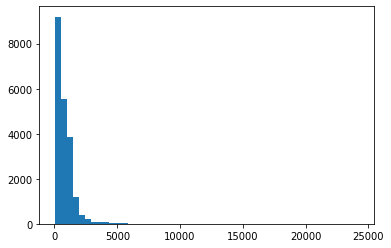

In [13]:
plt.hist(train_df['words'].values,bins=50)
plt.show()

In [14]:
train_df['words'].describe(percentiles=[.25,.50,.75,.90,.95,.99])

count    20800.000000
mean       776.128606
std        870.249799
min          5.000000
25%        284.000000
50%        572.000000
75%       1069.000000
90%       1484.000000
95%       1890.050000
99%       4066.020000
max      24248.000000
Name: words, dtype: float64

In [15]:
train_df.drop(['id','title','author','text','words'],axis=1,inplace=True)

In [22]:
train_df = train_df.rename(columns={'content':'text'})

In [23]:
train_df

,label,text
0,1,[AUTHOR] Darrell Lucus [TITLE] House Dem Aide:...
1,0,[AUTHOR] Daniel J. Flynn [TITLE] FLYNN: Hillar...
2,1,[AUTHOR] Consortiumnews.com [TITLE] Why the Tr...
3,1,[AUTHOR] Jessica Purkiss [TITLE] 15 Civilians ...
4,1,[AUTHOR] Howard Portnoy [TITLE] Iranian woman ...
...,...,...
20795,0,[AUTHOR] Jerome Hudson [TITLE] Rapper T.I.: Tr...
20796,0,[AUTHOR] Benjamin Hoffman [TITLE] N.F.L. Playo...
20797,0,[AUTHOR] Michael J. de la Merced and Rachel Ab...
20798,1,"[AUTHOR] Alex Ansary [TITLE] NATO, Russia To H..."


# Model

In [24]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
model_name = "distilbert-base-uncased"
num_labels = 2
model = AutoModelForSequenceClassification.from_pretrained(model_name,num_labels=num_labels)
tokenizer = AutoTokenizer.from_pretrained(model_name)

Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing DistilBertForSequenceClassification: ['vocab_layer_norm.weight', 'vocab_layer_norm.bias', 'vocab_transform.bias', 'vocab_transform.weight', 'vocab_projector.bias', 'vocab_projector.weight']
- This IS expected if you are initializing DistilBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['pre_classifier.bias', 'classifier.bias', 'classifier.w

In [25]:
from datasets import Dataset
dataset = Dataset.from_pandas(train_df)

In [26]:
dataset

Dataset({
    features: ['label', 'text'],
    num_rows: 20800
})

In [27]:
tokenizer

DistilBertTokenizerFast(name_or_path='distilbert-base-uncased', vocab_size=30522, model_max_length=512, is_fast=True, padding_side='right', truncation_side='right', special_tokens={'unk_token': '[UNK]', 'sep_token': '[SEP]', 'pad_token': '[PAD]', 'cls_token': '[CLS]', 'mask_token': '[MASK]'})

In [29]:
def tokenize_function(examples):
    return tokenizer(examples["text"], padding="max_length", truncation=True)

tokenized_datasets = dataset.map(tokenize_function, batched=True)

In [30]:
tokenized_datasets = tokenized_datasets.class_encode_column('label').train_test_split(
    test_size=0.25, 
    stratify_by_column='label',
    shuffle=True,
    seed=54321)

In [31]:
from transformers import Trainer, TrainingArguments
batch_size = 32

In [32]:
training_args = TrainingArguments(output_dir = './output/',
                                  num_train_epochs=2,
                                  learning_rate=2e-5,
                                  per_device_eval_batch_size=batch_size,
                                  per_device_train_batch_size=batch_size,
                                  weight_decay=0.01,
                                  evaluation_strategy='epoch',
                                  fp16=True)

In [33]:
import evaluate
metric = evaluate.load("accuracy")

In [34]:
def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = np.argmax(logits, axis=-1)
    return metric.compute(predictions=predictions, references=labels)

In [35]:
from transformers import DataCollatorWithPadding
data_collator = DataCollatorWithPadding(tokenizer=tokenizer)

In [36]:
trainer = Trainer(model=model,
                  args=training_args,
                  train_dataset=tokenized_datasets['train'],
                  eval_dataset=tokenized_datasets['test'],
                  data_collator=data_collator,
                  compute_metrics=compute_metrics,
                  tokenizer=tokenizer)

Using cuda_amp half precision backend


In [37]:
trainer.train()

The following columns in the training set don't have a corresponding argument in `DistilBertForSequenceClassification.forward` and have been ignored: text. If text are not expected by `DistilBertForSequenceClassification.forward`,  you can safely ignore this message.
/opt/conda/lib/python3.8/site-packages/transformers/optimization.py:306: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(
***** Running training *****
  Num examples = 15600
  Num Epochs = 2
  Instantaneous batch size per device = 32
  Total train batch size (w. parallel, distributed & accumulation) = 32
  Gradient Accumulation steps = 1
  Total optimization steps = 976
  Number of trainable parameters = 66955010


[2023-03-02 20:45:04.501: W smdistributed/modelparallel/torch/nn/predefined_hooks.py:78] Found unsupported HuggingFace version 4.26.1 for automated tensor parallelism. HuggingFace modules will not be automatically distributed. You can use smp.tp_register_with_module API to register desired modules for tensor parallelism, or directly instantiate an smp.nn.DistributedModule. Supported HuggingFace transformers versions for automated tensor parallelism: ['4.17.0', '4.20.1', '4.21.0']
[2023-03-02 20:45:04.591 pytorch-1-12-gpu-py-ml-g4dn-xlarge-60d67c819515f85736f0b2ea671f:291 INFO utils.py:28] RULE_JOB_STOP_SIGNAL_FILENAME: None
[2023-03-02 20:45:04.734 pytorch-1-12-gpu-py-ml-g4dn-xlarge-60d67c819515f85736f0b2ea671f:291 INFO profiler_config_parser.py:111] Unable to find config at /opt/ml/input/config/profilerconfig.json. Profiler is disabled.


/opt/conda/lib/python3.8/site-packages/smdebug-1.0.24b20230214-py3.8.egg/smdebug/profiler/system_metrics_reader.py:78: SyntaxWarning: "is not" with a literal. Did you mean "!="?
/opt/conda/lib/python3.8/site-packages/smdebug-1.0.24b20230214-py3.8.egg/smdebug/profiler/system_metrics_reader.py:78: SyntaxWarning: "is not" with a literal. Did you mean "!="?
You're using a DistilBertTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


Epoch,Training Loss,Validation Loss,Accuracy
1,No log,0.006526,0.998846
2,0.072100,0.005124,0.999038


The following columns in the evaluation set don't have a corresponding argument in `DistilBertForSequenceClassification.forward` and have been ignored: text. If text are not expected by `DistilBertForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Evaluation *****
  Num examples = 5200
  Batch size = 32
Saving model checkpoint to ./output/checkpoint-500
Configuration saved in ./output/checkpoint-500/config.json
Model weights saved in ./output/checkpoint-500/pytorch_model.bin
tokenizer config file saved in ./output/checkpoint-500/tokenizer_config.json
Special tokens file saved in ./output/checkpoint-500/special_tokens_map.json
The following columns in the evaluation set don't have a corresponding argument in `DistilBertForSequenceClassification.forward` and have been ignored: text. If text are not expected by `DistilBertForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Evaluation *****
  Num examples = 5200
  Batch

TrainOutput(global_step=976, training_loss=0.038501350117511435, metrics={'train_runtime': 636.2993, 'train_samples_per_second': 49.034, 'train_steps_per_second': 1.534, 'total_flos': 4132982838067200.0, 'train_loss': 0.038501350117511435, 'epoch': 2.0})

In [38]:
preds_output = trainer.predict(tokenized_datasets['test'])

The following columns in the test set don't have a corresponding argument in `DistilBertForSequenceClassification.forward` and have been ignored: text. If text are not expected by `DistilBertForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Prediction *****
  Num examples = 5200
  Batch size = 32


In [39]:
preds_output.metrics

{'test_loss': 0.005123512353748083,
 'test_accuracy': 0.9990384615384615,
 'test_runtime': 31.9037,
 'test_samples_per_second': 162.991,
 'test_steps_per_second': 5.109}

In [40]:
preds_output.predictions[201]

array([-4.324,  3.846], dtype=float16)

In [42]:
tokenized_datasets['test'][201]['text']

'[AUTHOR] Christian Gomez [TITLE] What to Expect From the New Congress [TEXT] Email \nIn what Democrats and the Left hoped would be a steal reclaiming control of both the House and Senate on the coattails of a much-anticipated Clinton victory, Republicans firmly held their ground retaining control of both chambers of Congress as Donald Trump wins the presidency. \nWith all 435 seats up for reelection in the 247-seat Republican-dominated House of Representatives, Democrats made only moderate gains picking up a net total of only five districts with only a few races remaining undecided as of Wednesday afternoon but not enough to alter the balance of power. \nUnsurprisingly, Paul Ryan, who has been critical of his party\'s own presidential nominee and now President-elect Donald Trump, easily won his reelection, defeating Democrat opponent Ryan Solen in a landslide with 65 percent of the vote. Although Ryan is favored to be reelected Speaker of the House for the incoming 115th Congress, he 

In [43]:
preds_output.predictions[203]

array([ 4.3 , -4.19], dtype=float16)

In [44]:
tokenized_datasets['test'][203]['text']

'[AUTHOR] Jennifer Steinhauer [TITLE] Democrats’ Weak Bench Undermines Hope of Taking Back Senate - The New York Times [TEXT] WASHINGTON  —   Senate Democrats, aware of the dead weight that Donald J. Trump has placed on their vulnerable Republican colleagues, can taste a reclaimed majority. But just as Senate Republicans blew their chances in 2010 and 2012 before finally taking control in 2014, Democrats find themselves hobbled by    candidates in races that could make the difference in winning a majority. In Pennsylvania, Katie McGinty, a relatively unknown former federal official who has never held elective office, is ahead in polls but lags Hillary Clinton’s large lead in the state. In Florida, a nasty primary between two flawed candidates could harm the Democrats’ chance to unseat Senator Marco Rubio. Several   Democrats turned down the chance to challenge Senator Richard Burr of North Carolina before they settled on a civil liberties lawyer, Deborah Ross, who is not necessarily a 

In [48]:
preds = np.argmax(preds_output.predictions,axis=1)

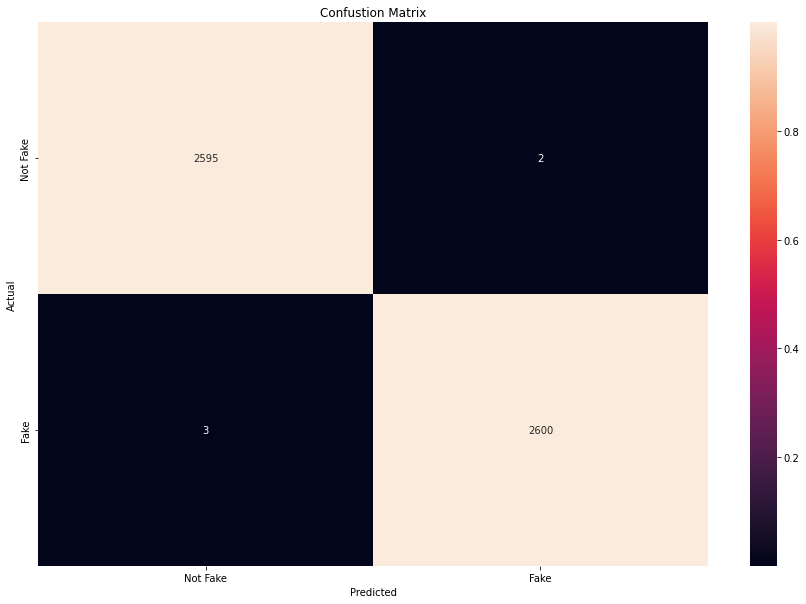

In [54]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
class_list = ['Not Fake','Fake']
fig, ax = plt.subplots(figsize=(15,10))
cm = confusion_matrix(tokenized_datasets['test']['label'],preds)
normalized_cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
sns.heatmap(normalized_cm, ax=ax, annot=cm, fmt='',xticklabels=class_list,yticklabels=class_list)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confustion Matrix')
plt.show()

In [66]:
from sklearn.metrics import classification_report
print(classification_report(tokenized_datasets['test']['label'],preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2597
           1       1.00      1.00      1.00      2603

    accuracy                           1.00      5200
   macro avg       1.00      1.00      1.00      5200
weighted avg       1.00      1.00      1.00      5200

